In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [45]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


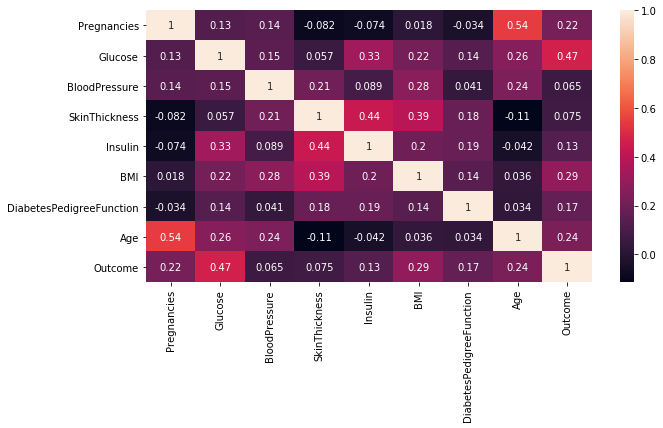

In [46]:
fig, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(data = df.corr(), ax = ax, annot = True)

In [47]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

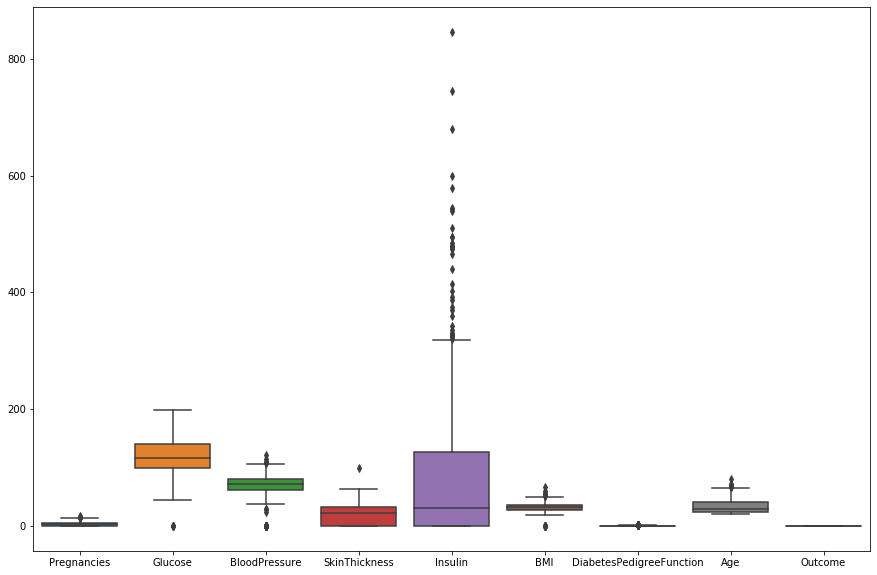

In [48]:
fig, ax = plt.subplots(figsize = (15, 10))

sns.boxplot(data = df, ax = ax)

Text(0.5, 1.0, 'Age')

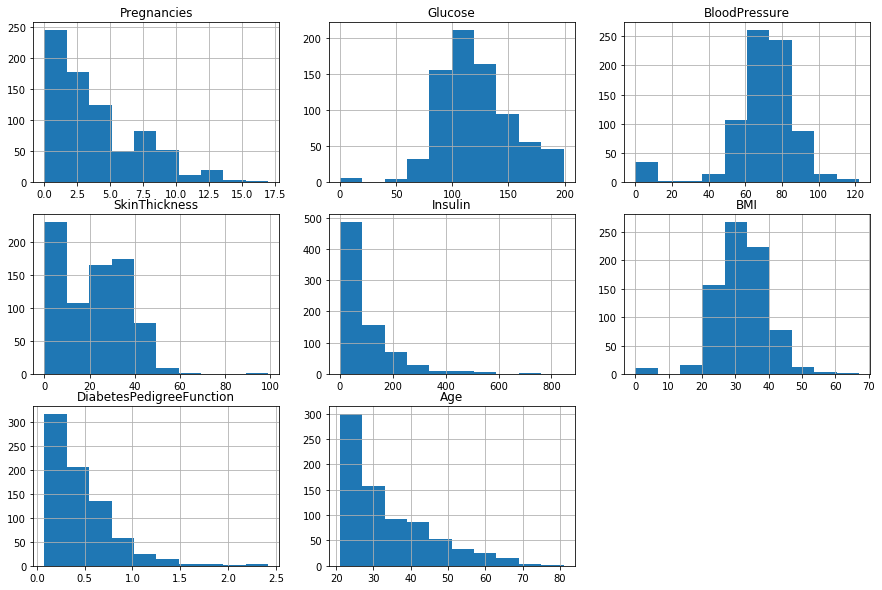

In [151]:
plt.figure(figsize = (15, 10))

plt.subplot(3,3,1)
fig = df['Pregnancies'].hist(bins = 10)
fig.set_title("Pregnancies")

plt.subplot(3,3,2)
fig = df['Glucose'].hist(bins = 10)
fig.set_title("Glucose")


plt.subplot(3,3,3)
fig = df['BloodPressure'].hist(bins = 10)
fig.set_title("BloodPressure")


plt.subplot(3,3,4)
fig = df['SkinThickness'].hist(bins = 10)
fig.set_title("SkinThickness")


plt.subplot(3,3,5)
fig = df['Insulin'].hist(bins = 10)
fig.set_title("Insulin")


plt.subplot(3,3,6)
fig = df['BMI'].hist(bins = 10)
fig.set_title("BMI")


plt.subplot(3,3,7)
fig = df['DiabetesPedigreeFunction'].hist(bins = 10)
fig.set_title("DiabetesPedigreeFunction")


plt.subplot(3,3,8)
fig = df['Age'].hist(bins = 10)
fig.set_title("Age")


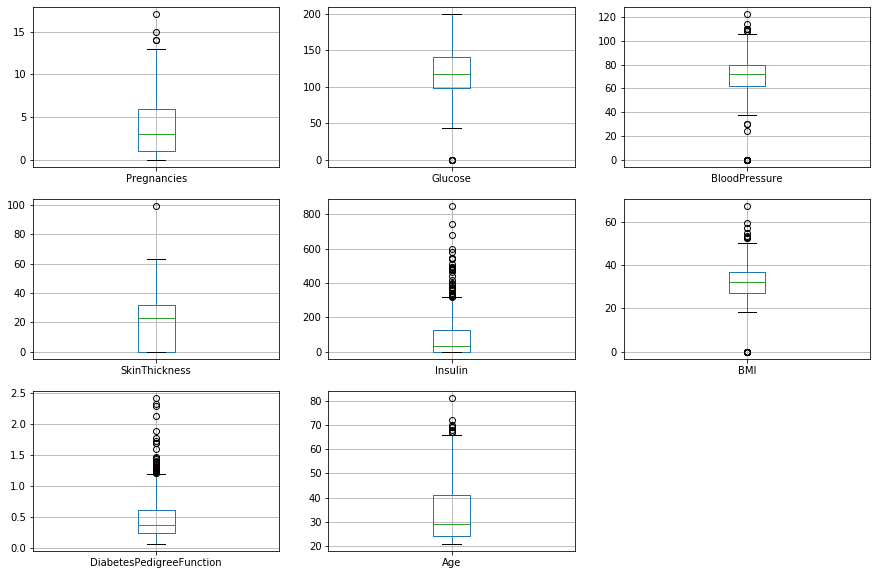

In [50]:
plt.figure(figsize = (15, 10))

plt.subplot(3,3,1)
fig = df.boxplot(column = ['Pregnancies'])
# fig.set_title("Pregnancies")

plt.subplot(3,3,2)
fig = df.boxplot(['Glucose'])
# fig.set_title("Glucose")


plt.subplot(3,3,3)
fig = df.boxplot(['BloodPressure'])
# fig.set_title("BloodPressure")


plt.subplot(3,3,4)
fig = df.boxplot(['SkinThickness'])
# fig.set_title("SkinThickness")


plt.subplot(3,3,5)
fig = df.boxplot(['Insulin'])
# fig.set_title("Insulin")


plt.subplot(3,3,6)
fig = df.boxplot(['BMI'])
# fig.set_title("BMI")


plt.subplot(3,3,7)
fig = df.boxplot(['DiabetesPedigreeFunction'])
# fig.set_title("DiabetesPedigreeFunction")


plt.subplot(3,3,8)
fig = df.boxplot(['Age'])
# fig.set_title("Age")


# Clearing the Outliers



In [111]:
IQR = df["BloodPressure"].quantile(0.75) - df["BloodPressure"].quantile(0.25)
min_val = df["BloodPressure"].quantile(0.25) - (IQR * 1.5)
max_val = df["BloodPressure"].quantile(0.75) + (IQR * 1.5)

min_val, max_val

(35.0, 107.0)

In [112]:
IQR = df["Insulin"].quantile(0.75) - df["Insulin"].quantile(0.25)
min_val = df["Insulin"].quantile(0.25) - (IQR * 1.5)
max_val = df["Insulin"].quantile(0.75) + (IQR * 1.5)

min_val, max_val

(-190.875, 318.125)

In [113]:
IQR = df["BMI"].quantile(0.75) - df["BMI"].quantile(0.25)
min_val = df["BMI"].quantile(0.25) - (IQR * 1.5)
max_val = df["BMI"].quantile(0.75) + (IQR * 1.5)

min_val, max_val

(13.35, 50.550000000000004)

In [114]:
IQR = df["DiabetesPedigreeFunction"].quantile(0.75) - df["DiabetesPedigreeFunction"].quantile(0.25)
min_val = df["DiabetesPedigreeFunction"].quantile(0.25) - (IQR * 1.5)
max_val = df["DiabetesPedigreeFunction"].quantile(0.75) + (IQR * 1.5)

min_val, max_val

(-0.32999999999999996, 1.2)

In [115]:
IQR = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)
min_val = df["Age"].quantile(0.25) - (1.5 * IQR)
max_val = df["Age"].quantile(0.75) + (1.5 * IQR)

min_val, max_val

(-1.5, 66.5)

In [116]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [118]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [119]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [120]:
def outliers(df1, col, max_val):
    
    return np.where(df1[col] > max_val, max_val, df1[col])
    
    
for df1 in [xtrain, xtest]:
    
    df1["BloodPressure"] = outliers(df1, "BloodPressure", 134.0)
    df1["Insulin"] = outliers(df1, "Insulin", 509.0)
    df1["BMI"] = outliers(df1, "BMI", 64.5)
    df1["Age"] = outliers(df1, "Age", 92.0)
    df1["DiabetesPedigreeFunction"] = outliers(df1, "DiabetesPedigreeFunction", 1.773)

C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Mathan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)

xtest = scaler.transform(xtest)

# Machine Learning Model

In [122]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = "liblinear", random_state = 0)

logreg.fit(xtrain, ytrain)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [123]:
y_pred = logreg.predict(xtest)

# Accuracy Score

In [124]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.8246753246753247

# Overfitting and Underfitting

In [125]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

In [126]:
train, test

(0.762214983713355, 0.8246753246753247)

# Cross Validation Score

In [127]:
from sklearn.model_selection import cross_val_score

In [133]:
cross_val_score(logreg, xtest, ytest, cv = 5, scoring = "accuracy")

array([0.87096774, 0.77419355, 0.83870968, 0.80645161, 0.8       ])

# Hyperparameter Optimization

In [138]:
param = [{"penalty": ["l1", "l2"]},
         {"C": [1, 10, 100, 1000]}, 
         
       ]

In [142]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(xtest, ytest)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [143]:
grid_search.best_score_

0.824516129032258

In [145]:
grid_search.best_params_

{'penalty': 'l1'}

In [147]:
y_pred_prob = logreg.predict_proba(xtest)[0:10]

y_pred_prob

array([[0.03853211, 0.96146789],
       [0.83300092, 0.16699908],
       [0.90211417, 0.09788583],
       [0.36373467, 0.63626533],
       [0.87056714, 0.12943286],
       [0.96096432, 0.03903568],
       [0.24936638, 0.75063362],
       [0.14435193, 0.85564807],
       [0.57914704, 0.42085296],
       [0.63343728, 0.36656272]])

In [148]:
logreg_best = LogisticRegression(penalty = "l1", solver = "liblinear", random_state = 0)

logreg_best.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
logreg_best.score(xtrain, ytrain), logreg_best.score(xtest, ytest)

(0.7638436482084691, 0.8246753246753247)